In [54]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import copy
from pylab import rcParams
# Import data using datetime and set index to datetime
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
df = pd.read_csv(r'D:\W STCA\DATA\PRE\D.csv')
                                
df
                    

,Date,PM2.5
0,04-12-2021 00:00,310.25
1,04-12-2021 01:00,307.50
2,04-12-2021 02:00,302.50
3,04-12-2021 03:00,284.50
4,04-12-2021 04:00,265.25
...,...,...
14539,01-08-2023 19:00,102.72
14540,01-08-2023 20:00,43.00
14541,01-08-2023 21:00,41.25
14542,01-08-2023 22:00,43.00


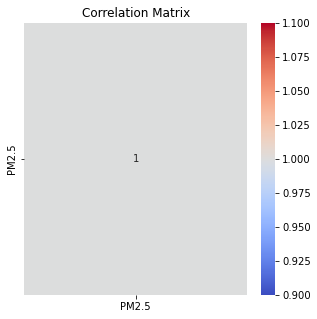

In [55]:
# Visualize the correlation between variables after removing outliers using a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:>

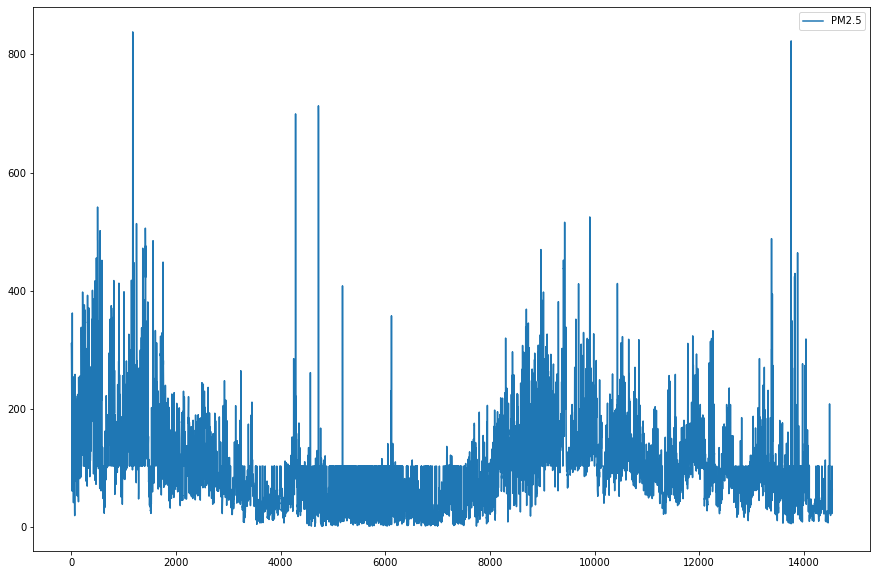

In [56]:
df.plot()

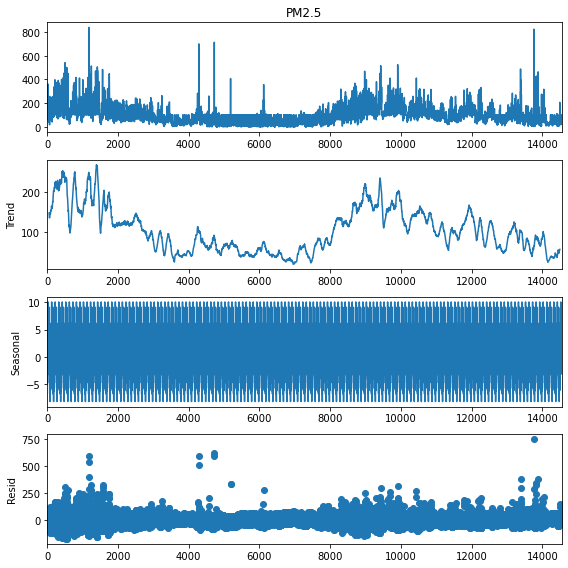

In [57]:
#final plot 1 downloaded
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 8,8
result = seasonal_decompose(df["PM2.5"],period=100 ,model='additive')
result.plot()
plt.savefig('Seasonal Decompose',bbox_inches ="tight",pad_inches = 0.1,transparent = False,facecolor ="w",edgecolor ='w',orientation ='landscape')

pyplot.show()

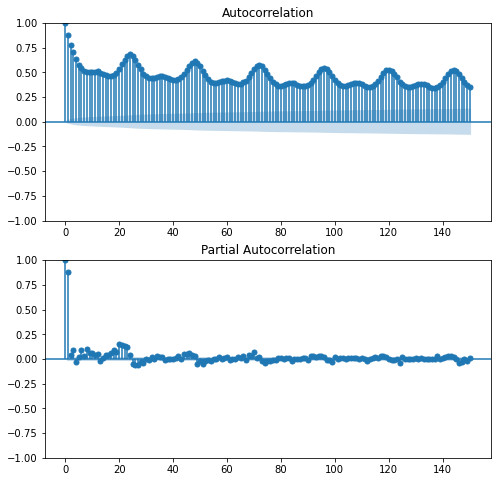

In [58]:
#final plot 2 downloaded
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["PM2.5"].values.squeeze(), lags=150, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["PM2.5"], lags=150, ax=ax2)
plt.savefig('ACF AND PACF.pdf',bbox_inches ="tight",pad_inches = 0.1,transparent = False,facecolor ="w",edgecolor ='w',orientation ='landscape',dpi=500)


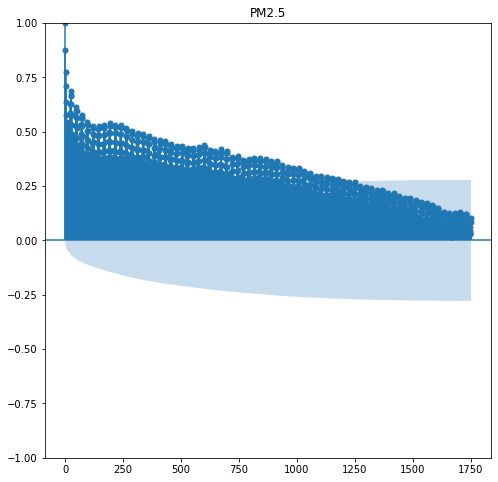

In [59]:
plot_acf(df["PM2.5"],lags=1750,title="PM2.5")
rcParams['figure.figsize'] = 8, 8
plt.savefig('Plot ACF',bbox_inches ="tight",pad_inches = 0.1,transparent = False,facecolor ="w",edgecolor ='w',orientation ='landscape')

plt.show()

In [60]:
from statsmodels.tsa.stattools import acf

# Compute the autocorrelation values
lags = 1750
acf_values = acf(df["PM2.5"], nlags=lags)

# Convert the autocorrelation values to a DataFrame
acf_df = pd.DataFrame({"Lag": range(lags + 1), "ACF": acf_values})

# Save the ACF data to a CSV file
acf_df.to_csv('C_ACF_Data.csv', index=False)


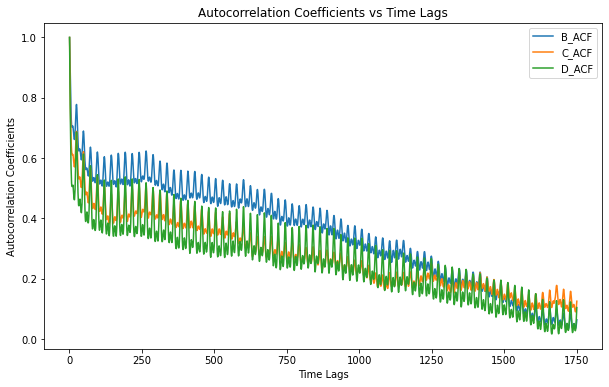

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the CSV file contains columns for Time Lags, Autocorrelation Coefficients 1, 2, and 3.
df = pd.read_csv(r'D:\W STCA\acf\ACF.csv')

plt.figure(figsize=(10, 6))

plt.plot(df.iloc[:, 0], df.iloc[:, 1], label=df.columns[1])  # Plotting Time Lags vs Autocorrelation Coefficients 1
plt.plot(df.iloc[:, 0], df.iloc[:, 2], label=df.columns[2])  # Plotting Time Lags vs Autocorrelation Coefficients 2
plt.plot(df.iloc[:, 0], df.iloc[:, 3], label=df.columns[3])  # Plotting Time Lags vs Autocorrelation Coefficients 3
# Uncomment the line below if you have more columns to plot
# plt.plot(df.iloc[:, 0], df.iloc[:, 4], label=df.columns[4])  # Plotting Time Lags vs Autocorrelation Coefficients 4

plt.xlabel('Time Lags')
plt.ylabel('Autocorrelation Coefficients')
plt.title('Autocorrelation Coefficients vs Time Lags')  # Add a title to the plot
plt.legend()  # Add a legend to the plot
plt.savefig('Autocorrelation Coefficients.pdf',bbox_inches ="tight",pad_inches = 0.1,transparent = False,facecolor ="w",edgecolor ='w',orientation ='landscape',dpi=800)

#plt.show()
